## Step 5: Additional analyses

**Project**: Predicting Bus Ridership \
**Team**: T20 - Eurus Li, Garrett Kent, Kate Munkacsy

### A. Initial setup

In [4]:
## UPDATE BEFORE RUNNING CODE
dir = "path/to/repo/"

In [5]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgb

### B. Prepare demographic data

In [7]:
demo_df = pd.read_excel(dir + "/Data/ACS 5 Year_Demographic Data_2019-2023.xlsx", sheet_name = "Data", header = [0, 1])
demo_df.columns = demo_df.columns.map('_'.join)
demo_df.rename({'Unnamed: 0_level_0_Label':'Label'}, inplace = True, axis = 1)
demo_df.head()

,Label,"Allegheny County, Pennsylvania_Estimate","Allegheny County, Pennsylvania_Margin of Error","Allegheny County, Pennsylvania_Percent","Allegheny County, Pennsylvania_Percent Margin of Error",ZCTA5 15003_Estimate,ZCTA5 15003_Margin of Error,ZCTA5 15003_Percent,ZCTA5 15003_Percent Margin of Error,ZCTA5 15005_Estimate,...,ZCTA5 16046_Percent,ZCTA5 16046_Percent Margin of Error,ZCTA5 16055_Estimate,ZCTA5 16055_Margin of Error,ZCTA5 16055_Percent,ZCTA5 16055_Percent Margin of Error,ZCTA5 16059_Estimate,ZCTA5 16059_Margin of Error,ZCTA5 16059_Percent,ZCTA5 16059_Percent Margin of Error
0,SEX AND AGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Total population,"1,240,476",*****,"1,240,476",(X),"11,394",±333,"11,394",(X),"9,574",...,"19,577",(X),"8,856",±421,"8,856",(X),"9,770",±512,"9,770",(X)
2,Male,"604,817",±35,48.8%,±0.1,"5,748",±307,50.4%,±2.2,"4,579",...,49.9%,±1.7,"4,438",±328,50.1%,±2.6,"4,800",±364,49.1%,±2.3
3,Female,"635,659",±35,51.2%,±0.1,"5,646",±302,49.6%,±2.2,"4,995",...,50.1%,±1.7,"4,418",±297,49.9%,±2.6,"4,970",±319,50.9%,±2.3
4,Sex ratio (males per 100 females),95.1,±0.1,(X),(X),101.8,±9.0,(X),(X),91.7,...,(X),(X),100.5,±10.5,(X),(X),96.6,±9.0,(X),(X)


In [8]:
demo_df['Topic'] = np.where(demo_df.iloc[:, 1:].isnull().all(axis=1), demo_df['Label'], np.nan)
demo_df.insert(0, 'Topic', demo_df.pop('Topic'))
demo_df['Topic'] = demo_df['Topic'].ffill()
demo_df.head()

,Topic,Label,"Allegheny County, Pennsylvania_Estimate","Allegheny County, Pennsylvania_Margin of Error","Allegheny County, Pennsylvania_Percent","Allegheny County, Pennsylvania_Percent Margin of Error",ZCTA5 15003_Estimate,ZCTA5 15003_Margin of Error,ZCTA5 15003_Percent,ZCTA5 15003_Percent Margin of Error,...,ZCTA5 16046_Percent,ZCTA5 16046_Percent Margin of Error,ZCTA5 16055_Estimate,ZCTA5 16055_Margin of Error,ZCTA5 16055_Percent,ZCTA5 16055_Percent Margin of Error,ZCTA5 16059_Estimate,ZCTA5 16059_Margin of Error,ZCTA5 16059_Percent,ZCTA5 16059_Percent Margin of Error
0,SEX AND AGE,SEX AND AGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SEX AND AGE,Total population,"1,240,476",*****,"1,240,476",(X),"11,394",±333,"11,394",(X),...,"19,577",(X),"8,856",±421,"8,856",(X),"9,770",±512,"9,770",(X)
2,SEX AND AGE,Male,"604,817",±35,48.8%,±0.1,"5,748",±307,50.4%,±2.2,...,49.9%,±1.7,"4,438",±328,50.1%,±2.6,"4,800",±364,49.1%,±2.3
3,SEX AND AGE,Female,"635,659",±35,51.2%,±0.1,"5,646",±302,49.6%,±2.2,...,50.1%,±1.7,"4,418",±297,49.9%,±2.6,"4,970",±319,50.9%,±2.3
4,SEX AND AGE,Sex ratio (males per 100 females),95.1,±0.1,(X),(X),101.8,±9.0,(X),(X),...,(X),(X),100.5,±10.5,(X),(X),96.6,±9.0,(X),(X)


In [9]:
## Handle duplicate rows
demo_df = demo_df[~demo_df.iloc[:, 2:].isnull().all(axis=1)].copy()
demo_df.head()

,Topic,Label,"Allegheny County, Pennsylvania_Estimate","Allegheny County, Pennsylvania_Margin of Error","Allegheny County, Pennsylvania_Percent","Allegheny County, Pennsylvania_Percent Margin of Error",ZCTA5 15003_Estimate,ZCTA5 15003_Margin of Error,ZCTA5 15003_Percent,ZCTA5 15003_Percent Margin of Error,...,ZCTA5 16046_Percent,ZCTA5 16046_Percent Margin of Error,ZCTA5 16055_Estimate,ZCTA5 16055_Margin of Error,ZCTA5 16055_Percent,ZCTA5 16055_Percent Margin of Error,ZCTA5 16059_Estimate,ZCTA5 16059_Margin of Error,ZCTA5 16059_Percent,ZCTA5 16059_Percent Margin of Error
1,SEX AND AGE,Total population,"1,240,476",*****,"1,240,476",(X),"11,394",±333,"11,394",(X),...,"19,577",(X),"8,856",±421,"8,856",(X),"9,770",±512,"9,770",(X)
2,SEX AND AGE,Male,"604,817",±35,48.8%,±0.1,"5,748",±307,50.4%,±2.2,...,49.9%,±1.7,"4,438",±328,50.1%,±2.6,"4,800",±364,49.1%,±2.3
3,SEX AND AGE,Female,"635,659",±35,51.2%,±0.1,"5,646",±302,49.6%,±2.2,...,50.1%,±1.7,"4,418",±297,49.9%,±2.6,"4,970",±319,50.9%,±2.3
4,SEX AND AGE,Sex ratio (males per 100 females),95.1,±0.1,(X),(X),101.8,±9.0,(X),(X),...,(X),(X),100.5,±10.5,(X),(X),96.6,±9.0,(X),(X)
5,SEX AND AGE,Under 5 years,"63,079",±29,5.1%,±0.1,484,±151,4.2%,±1.3,...,6.3%,±1.2,269,±108,3.0%,±1.2,640,±197,6.6%,±1.9


In [10]:
## Keep the first topic-label instance
## This is the highest level of information, which suits our needs
demo_df.drop_duplicates(inplace = True)
demo_df = demo_df.groupby(["Topic", "Label"]).first()
demo_df = demo_df.reset_index()
demo_df.head()

,Topic,Label,"Allegheny County, Pennsylvania_Estimate","Allegheny County, Pennsylvania_Margin of Error","Allegheny County, Pennsylvania_Percent","Allegheny County, Pennsylvania_Percent Margin of Error",ZCTA5 15003_Estimate,ZCTA5 15003_Margin of Error,ZCTA5 15003_Percent,ZCTA5 15003_Percent Margin of Error,...,ZCTA5 16046_Percent,ZCTA5 16046_Percent Margin of Error,ZCTA5 16055_Estimate,ZCTA5 16055_Margin of Error,ZCTA5 16055_Percent,ZCTA5 16055_Percent Margin of Error,ZCTA5 16059_Estimate,ZCTA5 16059_Margin of Error,ZCTA5 16059_Percent,ZCTA5 16059_Percent Margin of Error
0,"CITIZEN, VOTING AGE POPULATION","Citizen, 18 and over population","972,967","±1,561","972,967",(X),"9,180",±390,"9,180",(X),...,"13,696",(X),"6,994",±379,"6,994",(X),"7,541",±424,"7,541",(X)
1,"CITIZEN, VOTING AGE POPULATION",Female,"506,455",±920,52.1%,±0.1,"4,667",±309,50.8%,±2.5,...,49.9%,±1.7,"3,579",±260,51.2%,±2.6,"3,820",±231,50.7%,±2.0
2,"CITIZEN, VOTING AGE POPULATION",Male,"466,512","±1,043",47.9%,±0.1,"4,513",±288,49.2%,±2.5,...,50.1%,±1.7,"3,415",±269,48.8%,±2.6,"3,721",±288,49.3%,±2.0
3,HISPANIC OR LATINO AND RACE,American Indian and Alaska Native alone,692,±126,0.1%,±0.1,0,±18,0.0%,±0.3,...,0.0%,±0.2,0,±16,0.0%,±0.3,0,±16,0.0%,±0.3
4,HISPANIC OR LATINO AND RACE,Asian alone,"51,073",±948,4.1%,±0.1,7,±12,0.1%,±0.1,...,5.3%,±1.8,92,±89,1.0%,±1.0,8,±11,0.1%,±0.1


In [11]:
demo_melt_df = demo_df.melt(id_vars = ['Topic', 'Label'], var_name = 'Location')
demo_melt_df[['Location', 'Estimate Type']] = demo_melt_df['Location'].str.split('_', expand=True)
demo_melt_df.head()

,Topic,Label,Location,value,Estimate Type
0,"CITIZEN, VOTING AGE POPULATION","Citizen, 18 and over population","Allegheny County, Pennsylvania","972,967",Estimate
1,"CITIZEN, VOTING AGE POPULATION",Female,"Allegheny County, Pennsylvania","506,455",Estimate
2,"CITIZEN, VOTING AGE POPULATION",Male,"Allegheny County, Pennsylvania","466,512",Estimate
3,HISPANIC OR LATINO AND RACE,American Indian and Alaska Native alone,"Allegheny County, Pennsylvania",692,Estimate
4,HISPANIC OR LATINO AND RACE,Asian alone,"Allegheny County, Pennsylvania","51,073",Estimate


In [12]:
final_demo = demo_melt_df.pivot(index=['Topic', 'Label', 'Location'], columns = "Estimate Type", values = "value").reset_index()
final_demo.head()

Estimate Type,Topic,Label,Location,Estimate,Margin of Error,Percent,Percent Margin of Error
0,"CITIZEN, VOTING AGE POPULATION","Citizen, 18 and over population","Allegheny County, Pennsylvania","972,967","±1,561","972,967",(X)
1,"CITIZEN, VOTING AGE POPULATION","Citizen, 18 and over population",ZCTA5 15003,"9,180",±390,"9,180",(X)
2,"CITIZEN, VOTING AGE POPULATION","Citizen, 18 and over population",ZCTA5 15005,"8,089",±448,"8,089",(X)
3,"CITIZEN, VOTING AGE POPULATION","Citizen, 18 and over population",ZCTA5 15006,69,±102,69,(X)
4,"CITIZEN, VOTING AGE POPULATION","Citizen, 18 and over population",ZCTA5 15007,401.0,±386,401,(X)


In [13]:
final_demo['ZIP'] = np.where(final_demo['Location'].str.startswith('ZCTA5'), final_demo['Location'].str[-5:], '')
final_demo[final_demo['ZIP'] == ''].count()

Estimate Type
Topic                      84
Label                      84
Location                   84
Estimate                   84
Margin of Error            84
Percent                    84
Percent Margin of Error    84
ZIP                        84
dtype: int64

In [14]:
topics = ['SEX AND AGE', 'HISPANIC OR LATINO AND RACE']

age_cats = ['15 to 19 years', '20 to 24 years', '25 to 34 years', 
            '35 to 44 years', '45 to 54 years', '55 to 59 years', 
            '60 to 64 years', '65 to 74 years', '75 to 84 years', '85 years and over']

gender_cats = ['Female', 'Male']

race_ethn_cats = ['American Indian and Alaska Native alone', 'Asian alone', 'Black or African American alone', 
                  'Hispanic or Latino (of any race)', 'Native Hawaiian and Other Pacific Islander alone',
                  'White alone', 'Some Other Race alone', 'Two or More Races']

final_demo = final_demo[(final_demo['Topic'].isin(topics)) & (final_demo['Label'].isin(age_cats + gender_cats + race_ethn_cats))]

In [15]:
final_demo = final_demo[['Location', 'ZIP', 'Topic', 'Label', 'Estimate', 'Margin of Error', 'Percent', 'Percent Margin of Error']].copy()
final_demo.head()

Estimate Type,Location,ZIP,Topic,Label,Estimate,Margin of Error,Percent,Percent Margin of Error
360,"Allegheny County, Pennsylvania",,HISPANIC OR LATINO AND RACE,American Indian and Alaska Native alone,692,±126,0.1%,±0.1
361,ZCTA5 15003,15003,HISPANIC OR LATINO AND RACE,American Indian and Alaska Native alone,0,±18,0.0%,±0.3
362,ZCTA5 15005,15005,HISPANIC OR LATINO AND RACE,American Indian and Alaska Native alone,0,±16,0.0%,±0.3
363,ZCTA5 15006,15006,HISPANIC OR LATINO AND RACE,American Indian and Alaska Native alone,0,±11,0.0%,±22.5
364,ZCTA5 15007,15007,HISPANIC OR LATINO AND RACE,American Indian and Alaska Native alone,0.0,±11,0.0%,±6.1


### C. Prepare commute data

In [17]:
commute_df = pd.read_excel(dir + "/Data/ACS 5 Year_Commuting Data_2019-2023.xlsx", sheet_name = "Data",  header = [0, 1, 2])
commute_df.columns = commute_df.columns.map('_'.join)
commute_df.rename({'Unnamed: 0_level_0_Unnamed: 0_level_1_Label':'Label'}, inplace = True, axis = 1)
commute_df.head()

,Label,"Allegheny County, Pennsylvania_Total_Estimate","Allegheny County, Pennsylvania_Total_Margin of Error","Allegheny County, Pennsylvania_Male_Estimate","Allegheny County, Pennsylvania_Male_Margin of Error","Allegheny County, Pennsylvania_Female_Estimate","Allegheny County, Pennsylvania_Female_Margin of Error",ZCTA5 15003_Total_Estimate,ZCTA5 15003_Total_Margin of Error,ZCTA5 15003_Male_Estimate,...,ZCTA5 16055_Male_Estimate,ZCTA5 16055_Male_Margin of Error,ZCTA5 16055_Female_Estimate,ZCTA5 16055_Female_Margin of Error,ZCTA5 16059_Total_Estimate,ZCTA5 16059_Total_Margin of Error,ZCTA5 16059_Male_Estimate,ZCTA5 16059_Male_Margin of Error,ZCTA5 16059_Female_Estimate,ZCTA5 16059_Female_Margin of Error
0,Workers 16 years and over,"625,443","±3,226","324,264","±2,203","301,179","±2,392","5,653",±482,"2,803",...,"2,057",±237,"1,901",±256,"4,538",±398,"2,423",±254,"2,115",±267
1,MEANS OF TRANSPORTATION TO WORK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Car, truck, or van",69.9%,±0.5,71.9%,±0.7,67.7%,±0.7,84.6%,±3.2,81.1%,...,86.8%,±6.3,84.8%,±5.5,81.2%,±6.4,82.7%,±6.5,79.5%,±7.8
3,Drove alone,63.3%,±0.4,65.7%,±0.6,60.7%,±0.7,75.0%,±5.0,73.9%,...,79.5%,±7.0,79.9%,±6.2,76.3%,±6.7,79.2%,±6.9,73.0%,±8.6
4,Carpooled,6.6%,±0.2,6.2%,±0.4,7.1%,±0.3,9.6%,±3.8,7.2%,...,7.3%,±3.6,4.9%,±2.9,4.9%,±2.3,3.5%,±2.7,6.5%,±3.7


In [18]:
commute_df['Topic'] = np.where(commute_df.iloc[:, 1:].isnull().all(axis=1), commute_df['Label'], np.nan)
commute_df.insert(0, 'Topic', commute_df.pop('Topic'))
commute_df['Topic'] = commute_df['Topic'].ffill()
commute_df.head()

,Topic,Label,"Allegheny County, Pennsylvania_Total_Estimate","Allegheny County, Pennsylvania_Total_Margin of Error","Allegheny County, Pennsylvania_Male_Estimate","Allegheny County, Pennsylvania_Male_Margin of Error","Allegheny County, Pennsylvania_Female_Estimate","Allegheny County, Pennsylvania_Female_Margin of Error",ZCTA5 15003_Total_Estimate,ZCTA5 15003_Total_Margin of Error,...,ZCTA5 16055_Male_Estimate,ZCTA5 16055_Male_Margin of Error,ZCTA5 16055_Female_Estimate,ZCTA5 16055_Female_Margin of Error,ZCTA5 16059_Total_Estimate,ZCTA5 16059_Total_Margin of Error,ZCTA5 16059_Male_Estimate,ZCTA5 16059_Male_Margin of Error,ZCTA5 16059_Female_Estimate,ZCTA5 16059_Female_Margin of Error
0,NaN,Workers 16 years and over,"625,443","±3,226","324,264","±2,203","301,179","±2,392","5,653",±482,...,"2,057",±237,"1,901",±256,"4,538",±398,"2,423",±254,"2,115",±267
1,MEANS OF TRANSPORTATION TO WORK,MEANS OF TRANSPORTATION TO WORK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MEANS OF TRANSPORTATION TO WORK,"Car, truck, or van",69.9%,±0.5,71.9%,±0.7,67.7%,±0.7,84.6%,±3.2,...,86.8%,±6.3,84.8%,±5.5,81.2%,±6.4,82.7%,±6.5,79.5%,±7.8
3,MEANS OF TRANSPORTATION TO WORK,Drove alone,63.3%,±0.4,65.7%,±0.6,60.7%,±0.7,75.0%,±5.0,...,79.5%,±7.0,79.9%,±6.2,76.3%,±6.7,79.2%,±6.9,73.0%,±8.6
4,MEANS OF TRANSPORTATION TO WORK,Carpooled,6.6%,±0.2,6.2%,±0.4,7.1%,±0.3,9.6%,±3.8,...,7.3%,±3.6,4.9%,±2.9,4.9%,±2.3,3.5%,±2.7,6.5%,±3.7


In [19]:
## Handle duplicate rows
commute_df = commute_df[~commute_df.iloc[:, 2:].isnull().all(axis=1)].copy()
commute_df.head()

,Topic,Label,"Allegheny County, Pennsylvania_Total_Estimate","Allegheny County, Pennsylvania_Total_Margin of Error","Allegheny County, Pennsylvania_Male_Estimate","Allegheny County, Pennsylvania_Male_Margin of Error","Allegheny County, Pennsylvania_Female_Estimate","Allegheny County, Pennsylvania_Female_Margin of Error",ZCTA5 15003_Total_Estimate,ZCTA5 15003_Total_Margin of Error,...,ZCTA5 16055_Male_Estimate,ZCTA5 16055_Male_Margin of Error,ZCTA5 16055_Female_Estimate,ZCTA5 16055_Female_Margin of Error,ZCTA5 16059_Total_Estimate,ZCTA5 16059_Total_Margin of Error,ZCTA5 16059_Male_Estimate,ZCTA5 16059_Male_Margin of Error,ZCTA5 16059_Female_Estimate,ZCTA5 16059_Female_Margin of Error
0,NaN,Workers 16 years and over,"625,443","±3,226","324,264","±2,203","301,179","±2,392","5,653",±482,...,"2,057",±237,"1,901",±256,"4,538",±398,"2,423",±254,"2,115",±267
2,MEANS OF TRANSPORTATION TO WORK,"Car, truck, or van",69.9%,±0.5,71.9%,±0.7,67.7%,±0.7,84.6%,±3.2,...,86.8%,±6.3,84.8%,±5.5,81.2%,±6.4,82.7%,±6.5,79.5%,±7.8
3,MEANS OF TRANSPORTATION TO WORK,Drove alone,63.3%,±0.4,65.7%,±0.6,60.7%,±0.7,75.0%,±5.0,...,79.5%,±7.0,79.9%,±6.2,76.3%,±6.7,79.2%,±6.9,73.0%,±8.6
4,MEANS OF TRANSPORTATION TO WORK,Carpooled,6.6%,±0.2,6.2%,±0.4,7.1%,±0.3,9.6%,±3.8,...,7.3%,±3.6,4.9%,±2.9,4.9%,±2.3,3.5%,±2.7,6.5%,±3.7
5,MEANS OF TRANSPORTATION TO WORK,In 2-person carpool,5.5%,±0.2,5.1%,±0.3,5.9%,±0.3,9.4%,±3.8,...,7.3%,±3.6,3.4%,±2.7,4.7%,±2.3,3.1%,±2.6,6.5%,±3.7


In [20]:
## Keep the first topic-label instance
## This is the highest level of information, which suits our needs
commute_df.drop_duplicates(inplace = True)
commute_df = commute_df.groupby(["Topic", "Label"]).first()
commute_df = commute_df.reset_index()
commute_df.head()

,Topic,Label,"Allegheny County, Pennsylvania_Total_Estimate","Allegheny County, Pennsylvania_Total_Margin of Error","Allegheny County, Pennsylvania_Male_Estimate","Allegheny County, Pennsylvania_Male_Margin of Error","Allegheny County, Pennsylvania_Female_Estimate","Allegheny County, Pennsylvania_Female_Margin of Error",ZCTA5 15003_Total_Estimate,ZCTA5 15003_Total_Margin of Error,...,ZCTA5 16055_Male_Estimate,ZCTA5 16055_Male_Margin of Error,ZCTA5 16055_Female_Estimate,ZCTA5 16055_Female_Margin of Error,ZCTA5 16059_Total_Estimate,ZCTA5 16059_Total_Margin of Error,ZCTA5 16059_Male_Estimate,ZCTA5 16059_Male_Margin of Error,ZCTA5 16059_Female_Estimate,ZCTA5 16059_Female_Margin of Error
0,MEANS OF TRANSPORTATION TO WORK,Bicycle,0.4%,±0.1,0.6%,±0.1,0.1%,±0.1,0.0%,±0.5,...,0.0%,±1.4,0.0%,±1.6,0.0%,±0.7,0.0%,±1.2,0.0%,±1.4
1,MEANS OF TRANSPORTATION TO WORK,"Car, truck, or van",69.9%,±0.5,71.9%,±0.7,67.7%,±0.7,84.6%,±3.2,...,86.8%,±6.3,84.8%,±5.5,81.2%,±6.4,82.7%,±6.5,79.5%,±7.8
2,MEANS OF TRANSPORTATION TO WORK,Carpooled,6.6%,±0.2,6.2%,±0.4,7.1%,±0.3,9.6%,±3.8,...,7.3%,±3.6,4.9%,±2.9,4.9%,±2.3,3.5%,±2.7,6.5%,±3.7
3,MEANS OF TRANSPORTATION TO WORK,Drove alone,63.3%,±0.4,65.7%,±0.6,60.7%,±0.7,75.0%,±5.0,...,79.5%,±7.0,79.9%,±6.2,76.3%,±6.7,79.2%,±6.9,73.0%,±8.6
4,MEANS OF TRANSPORTATION TO WORK,In 2-person carpool,5.5%,±0.2,5.1%,±0.3,5.9%,±0.3,9.4%,±3.8,...,7.3%,±3.6,3.4%,±2.7,4.7%,±2.3,3.1%,±2.6,6.5%,±3.7


In [21]:
commute_melt_df = commute_df.melt(id_vars = ['Topic', 'Label'], var_name = 'Location')
commute_melt_df[['Location', 'Subgroup', 'Estimate Type']] = commute_melt_df['Location'].str.split('_', expand=True)
commute_melt_df.head()

,Topic,Label,Location,value,Subgroup,Estimate Type
0,MEANS OF TRANSPORTATION TO WORK,Bicycle,"Allegheny County, Pennsylvania",0.4%,Total,Estimate
1,MEANS OF TRANSPORTATION TO WORK,"Car, truck, or van","Allegheny County, Pennsylvania",69.9%,Total,Estimate
2,MEANS OF TRANSPORTATION TO WORK,Carpooled,"Allegheny County, Pennsylvania",6.6%,Total,Estimate
3,MEANS OF TRANSPORTATION TO WORK,Drove alone,"Allegheny County, Pennsylvania",63.3%,Total,Estimate
4,MEANS OF TRANSPORTATION TO WORK,In 2-person carpool,"Allegheny County, Pennsylvania",5.5%,Total,Estimate


In [22]:
final_commute = commute_melt_df.pivot(index=['Topic', 'Label', 'Subgroup', 'Location'], columns = "Estimate Type", values = "value").reset_index()
final_commute.head()

Estimate Type,Topic,Label,Subgroup,Location,Estimate,Margin of Error
0,MEANS OF TRANSPORTATION TO WORK,Bicycle,Female,"Allegheny County, Pennsylvania",0.1%,±0.1
1,MEANS OF TRANSPORTATION TO WORK,Bicycle,Female,ZCTA5 15003,0.0%,±1.0
2,MEANS OF TRANSPORTATION TO WORK,Bicycle,Female,ZCTA5 15005,0.0%,±1.3
3,MEANS OF TRANSPORTATION TO WORK,Bicycle,Female,ZCTA5 15006,32.0%,±12.8
4,MEANS OF TRANSPORTATION TO WORK,Bicycle,Female,ZCTA5 15007,0.0%,±26.1


In [23]:
final_commute['ZIP'] = np.where(final_commute['Location'].str.startswith('ZCTA5'), final_commute['Location'].str[-5:], '')
final_commute[final_commute['ZIP'] == ''].count()

Estimate Type
Topic              168
Label              168
Subgroup           168
Location           168
Estimate           168
Margin of Error    168
ZIP                168
dtype: int64

In [24]:
final_commute = final_commute[['Location', 'ZIP', 'Topic', 'Label', 'Subgroup', 'Estimate', 'Margin of Error']].copy()
final_commute = final_commute[(final_commute['Topic'] == 'MEANS OF TRANSPORTATION TO WORK') & (final_commute['Subgroup'] == 'Total')]
final_commute.head()

Estimate Type,Location,ZIP,Topic,Label,Subgroup,Estimate,Margin of Error
240,"Allegheny County, Pennsylvania",,MEANS OF TRANSPORTATION TO WORK,Bicycle,Total,0.4%,±0.1
241,ZCTA5 15003,15003,MEANS OF TRANSPORTATION TO WORK,Bicycle,Total,0.0%,±0.5
242,ZCTA5 15005,15005,MEANS OF TRANSPORTATION TO WORK,Bicycle,Total,0.0%,±0.6
243,ZCTA5 15006,15006,MEANS OF TRANSPORTATION TO WORK,Bicycle,Total,23.2%,±12.6
244,ZCTA5 15007,15007,MEANS OF TRANSPORTATION TO WORK,Bicycle,Total,0.0%,±16.5


In [25]:
final_commute['Subgroup'].value_counts()

Subgroup
Total    1440
Name: count, dtype: int64

### D. Join Census data with bus data

In [27]:
stop_df = pd.read_csv(dir + "/Data/stop_usage.csv")
route_df = pd.read_csv(dir + "/Data/top10_routes.csv")

In [28]:
stop_df.head()

,clever_id,stop_id,stop_name,direction,routes_ser,latitude,longitude,mode,shelter,stop_type,...,route_name,serviceday,total_ons,total_offs,days,avg_ons,avg_offs,total_precip,avg_temp,ZIP
0,7858,E02110,5TH ST AT CAVIT AVE,Inbound,"69, P69",40.3858,-79.76,Bus,No Shelter,Bus Stop,...,69,Sat,12.0,0.0,4,3.000000,0.00,2.45,71.9,15085
1,7858,E02110,5TH ST AT CAVIT AVE,Inbound,"69, P69",40.3858,-79.76,Bus,No Shelter,Bus Stop,...,69,Sun,14.0,0.0,6,2.333333,0.00,2.45,71.9,15085
2,7858,E02110,5TH ST AT CAVIT AVE,Inbound,"69, P69",40.3858,-79.76,Bus,No Shelter,Bus Stop,...,69,Weekday,64.0,1.0,20,3.200000,0.05,2.45,71.9,15085
3,7858,E02110,5TH ST AT CAVIT AVE,Inbound,"69, P69",40.3858,-79.76,Bus,No Shelter,Bus Stop,...,P69,Weekday,39.0,0.0,20,1.950000,0.00,2.45,71.9,15085
4,7858,E02110,5TH ST AT CAVIT AVE,Inbound,"69, P69",40.3858,-79.76,Bus,No Shelter,Bus Stop,...,69,Sat,11.0,0.0,4,2.750000,0.00,3.52,35.4,15085


In [29]:
zips = stop_df[['routes_ser', 'ZIP']].drop_duplicates().reset_index()

In [30]:
# Update data structure to map routes to ZIP codes
cols = []
for i in range(21):
    cols.append(f'route_{i}')

zips[cols] = zips['routes_ser'].str.split(",", expand=True)
zips = pd.melt(zips, id_vars=['index', 'ZIP', 'routes_ser'])
zips = zips[~zips['value'].isna()]
zips.rename(columns = {'value':'route'}, inplace = True)
zips = zips[['route', 'ZIP']]
zips.drop_duplicates(inplace = True)

# Preview results
zips.head()

,route,ZIP
0,69,15085
1,1,15068
2,14,15003
3,1,15215
4,8,15214


In [31]:
route_df = route_df[['route', 'avg_predicted_ridership']]
route_df

,route,avg_predicted_ridership
0,RED,4315.781217
1,51,4095.593988
2,61C,3926.211187
3,61A,3558.782615
4,P1,3477.103887
5,71B,3392.638835
6,61B,3166.685227
7,71C,2795.555222
8,82,2689.133251
9,61D,2484.197163


In [32]:
## merge ZIP from stop data onto route data
relevant_zips = zips[zips['route'].isin(route_df['route'].tolist())].reset_index(drop = True)
relevant_zips = relevant_zips.groupby('ZIP')['route'].apply(list).reset_index()
relevant_zips['ZIP'] = relevant_zips['ZIP'].astype(str)
relevant_zips

,ZIP,route
0,15104,"[61B, 61A]"
1,15110,[61C]
2,15120,[61C]
3,15122,"[51, 61C]"
4,15132,[61C]
5,15206,"[82, P1, 71C, 71B]"
6,15208,"[71C, P1]"
7,15210,[51]
8,15213,"[71B, 82, 61A]"
9,15217,"[61A, 61C]"


### E. Visualize demographic and commuter data

Of the top routes, 71C is expected to be the most disrupted in the draft redesign \
Route 71C covers 15206, 15208, and 15221

In [35]:
demo_data = final_demo[final_demo['ZIP'].isin(['', '15206', '15208', '15221'])].copy()
demo_data['ZIP'] = np.where(demo_data['ZIP'] == '', 'Allegheny County', demo_data['ZIP'])

demo_data['Percent'] = demo_data['Percent'].str.rstrip('%').astype('float') / 100
demo_data['Grouping'] = np.where(demo_data['Label'].isin(['American Indian and Alaska Native alone', 
                                                            'Native Hawaiian and Other Pacific Islander alone',
                                                            'Some Other Race alone']), 'Another Race alone', demo_data['Label'])
demo_data['Percent'] = demo_data.groupby(['ZIP', 'Grouping'])['Percent'].transform('sum')

race_ethn_cats = ['White alone', 'Black or African American alone', 'Another Race alone', 
                  'Two or More Races', 'Asian alone', 'Hispanic or Latino (of any race)']

In [36]:
commute_data = final_commute[final_commute['ZIP'].isin(['', '15206', '15208', '15221'])].copy()
commute_data['ZIP'] = np.where(commute_data['ZIP'] == '', 'Allegheny County', commute_data['ZIP'])
commute_data['Percent'] = commute_data['Estimate'].str.rstrip('%').astype('float') / 100

In [37]:
zips = ['Allegheny County', '15206', '15208', '15221']
num_zips = len(zips)

**Plot race/ethnicity distributions**

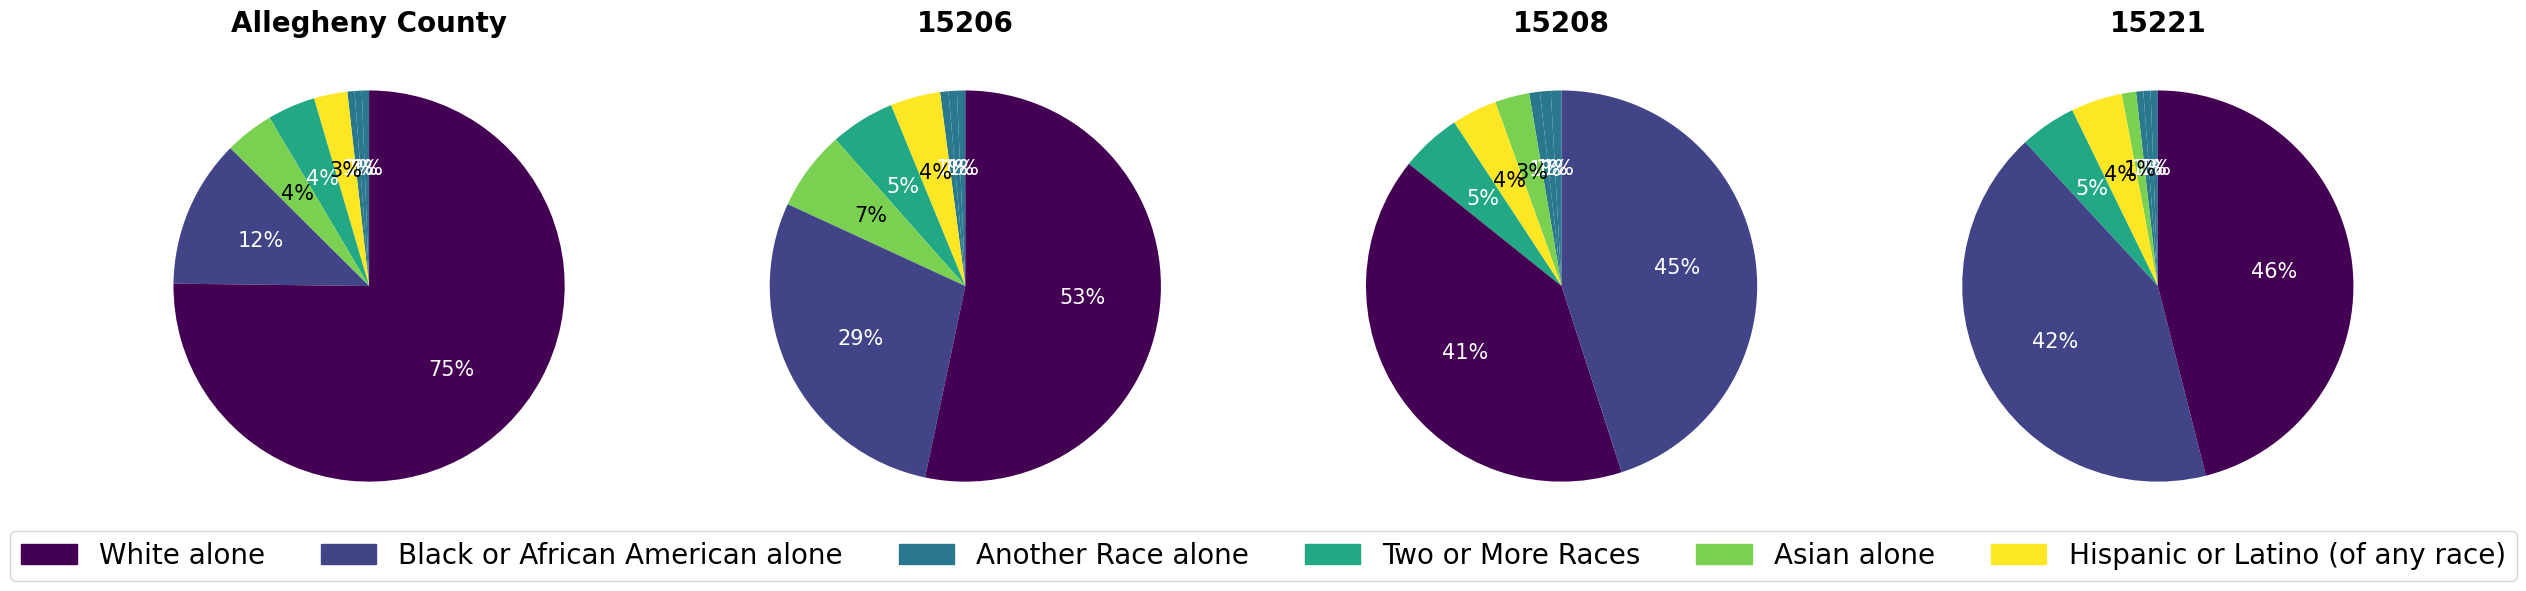

In [39]:
categories = race_ethn_cats

fig, axes = plt.subplots(1, num_zips, figsize=(6 * num_zips, 6))
colors = plt.cm.get_cmap('viridis', len(categories))(range(len(categories)))
patches = [plt.Rectangle((0, 0), 1, 1, color=colors[i]) for i in range(len(categories))]

for i, zip_code in enumerate(zips):
    zip_data = demo_data[demo_data['ZIP'] == zip_code]
    zip_data = zip_data[zip_data['Grouping'].isin(categories)]
    zip_data = zip_data.sort_values(by = 'Percent')
    sizes = zip_data['Percent']
    subplot_colors = [colors[list(categories).index(label)] for label in zip_data['Grouping']]
    
    ax = axes[i]
    patches_subplot, texts, autotexts = ax.pie(sizes, autopct = '%1.0f%%',
                                               shadow = False, startangle = 90, textprops={'fontsize': 15},
                                               colors = [colors[list(categories).index(label)] for label in zip_data['Grouping']])

    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax.set_title(f'{zip_code}', fontdict={'fontsize': 20, 'fontweight': 'bold'})
    ax.set_xlabel(None)
    ax.set_ylabel(None)

    # Adjust label properties
    for autotext, color in zip(autotexts, subplot_colors):
        r, g, b = to_rgb(color)
        brightness = 0.299 * r + 0.587 * g + 0.114 * b
        if brightness < 0.5:  # Adjust this threshold as needed
            autotext.set_color('white')
        else:
            autotext.set_color('black')

# Add a single legend to the figure
fig.legend(patches, categories, loc='lower center', bbox_to_anchor=(0.5, -0.05),
           ncol=len(categories), fontsize='20', bbox_transform=fig.transFigure)

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent overlap with suptitle
plt.show()

**Plot gender distributions**

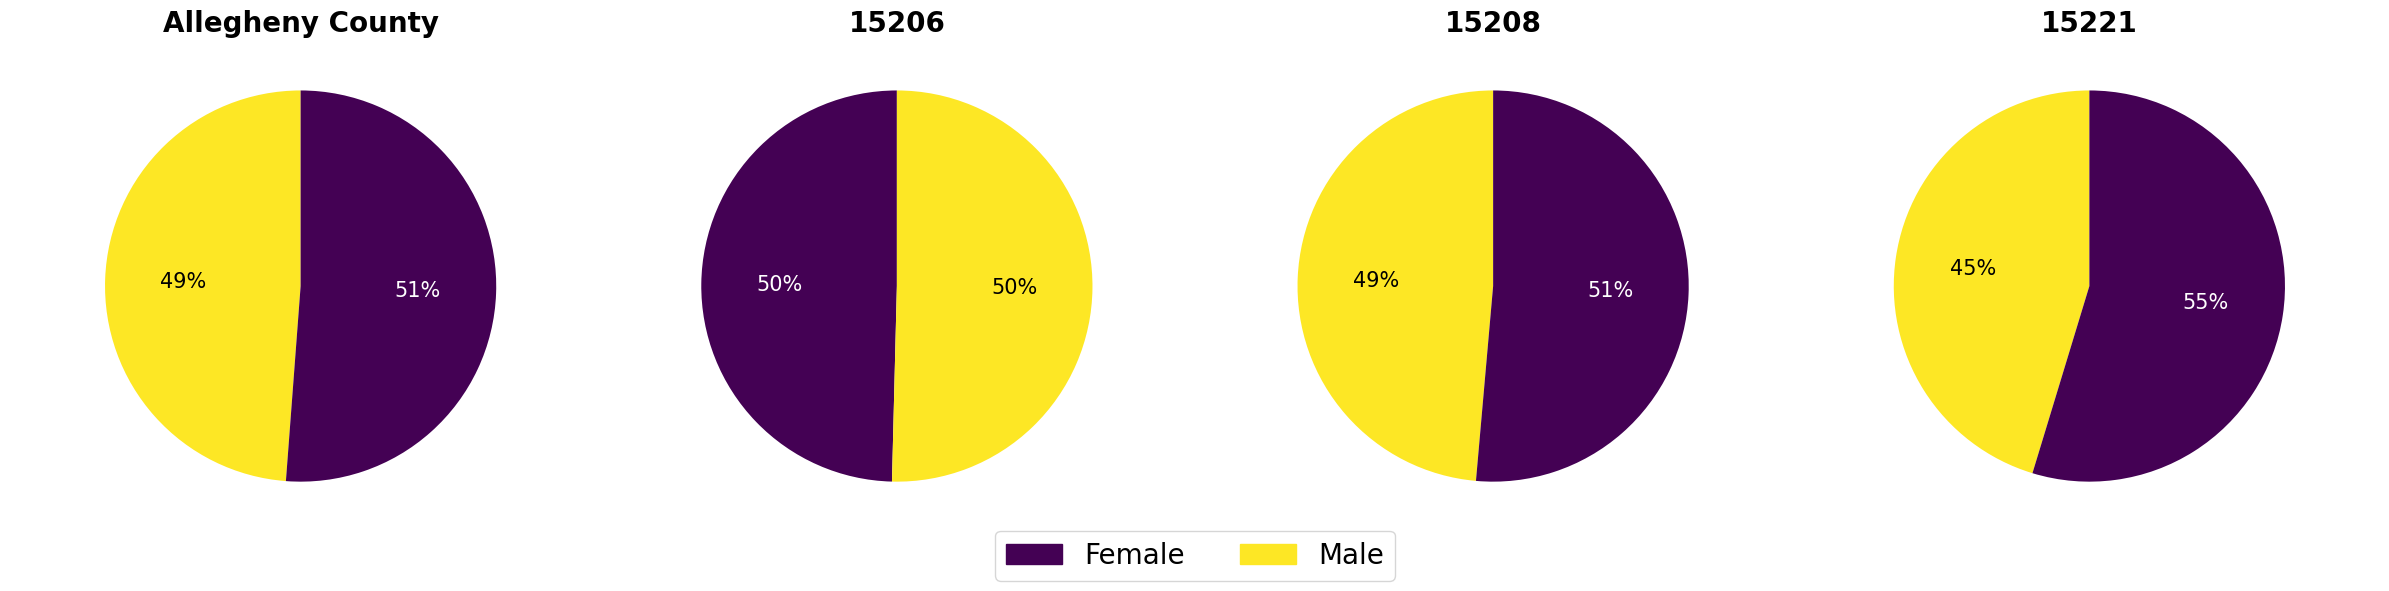

In [41]:
categories = gender_cats

fig, axes = plt.subplots(1, num_zips, figsize=(6 * num_zips, 6))
colors = plt.cm.get_cmap('viridis', len(categories))(range(len(categories)))
patches = [plt.Rectangle((0, 0), 1, 1, color=colors[i]) for i in range(len(categories))]

for i, zip_code in enumerate(zips):
    zip_data = demo_data[demo_data['ZIP'] == zip_code]
    zip_data = zip_data[zip_data['Label'].isin(categories)]
    zip_data = zip_data.sort_values(by = 'Percent')
    sizes = zip_data['Percent']
    subplot_colors = [colors[list(categories).index(label)] for label in zip_data['Label']]
    
    ax = axes[i]
    patches_subplot, texts, autotexts = ax.pie(sizes, autopct = '%1.0f%%',
                                               shadow = False, startangle = 90, textprops={'fontsize': 15},
                                               colors = [colors[list(categories).index(label)] for label in zip_data['Label']])

    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax.set_title(f'{zip_code}', fontdict={'fontsize': 20, 'fontweight': 'bold'})
    ax.set_xlabel(None)
    ax.set_ylabel(None)

    # Adjust label properties
    for autotext, color in zip(autotexts, subplot_colors):
        r, g, b = to_rgb(color)
        brightness = 0.299 * r + 0.587 * g + 0.114 * b
        if brightness < 0.5:  # Adjust this threshold as needed
            autotext.set_color('white')
        else:
            autotext.set_color('black')

# Add a single legend to the figure
fig.legend(patches, categories, loc='lower center', bbox_to_anchor=(0.5, -0.05),
           ncol=len(categories), fontsize='20', bbox_transform=fig.transFigure)

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent overlap with suptitle
plt.show()

**Plot age distributions**

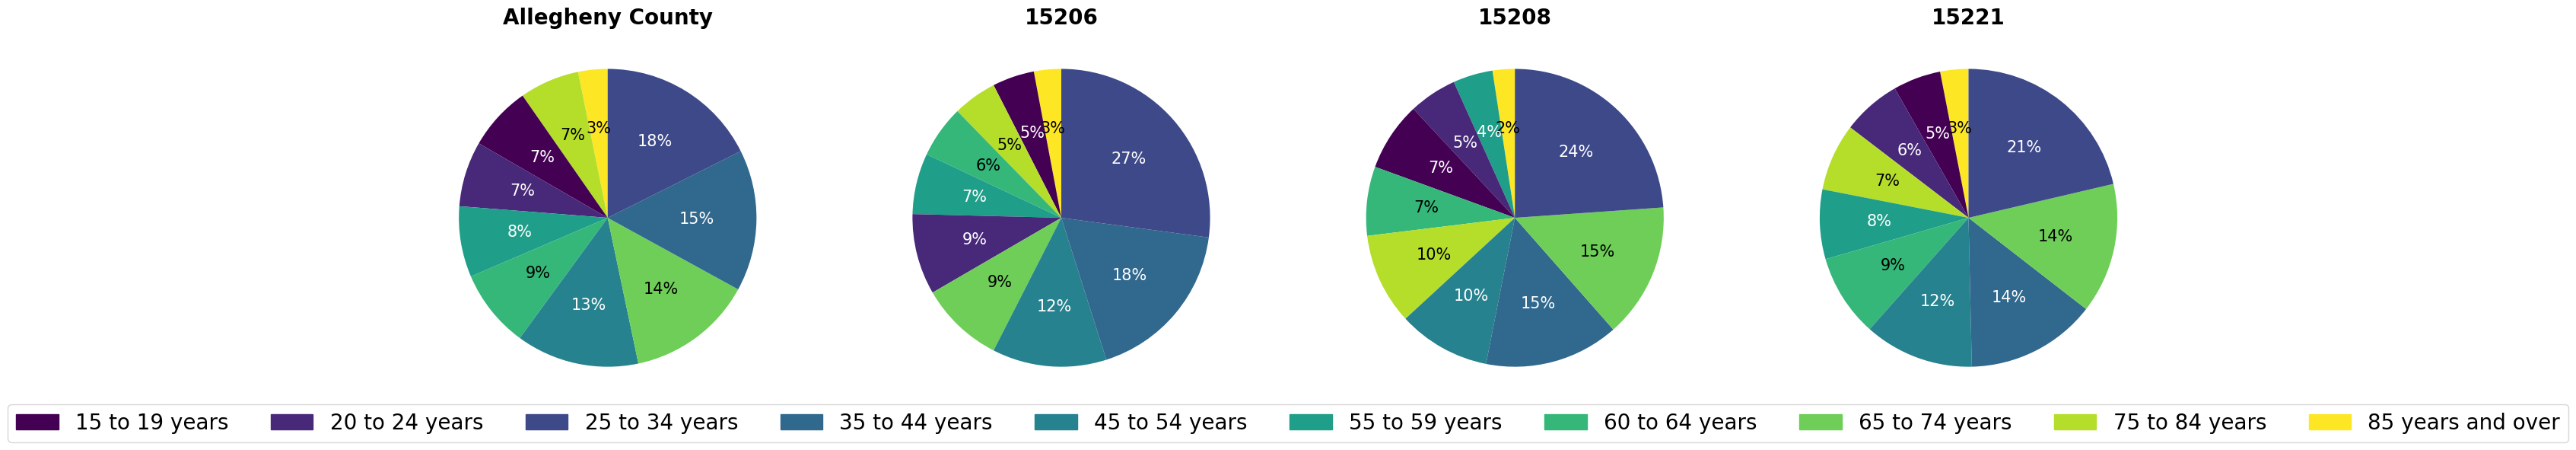

In [43]:
categories = age_cats

fig, axes = plt.subplots(1, num_zips, figsize=(6 * num_zips, 6))  # Adjust figsize as needed
colors = plt.cm.get_cmap('viridis', len(categories))(range(len(categories)))
patches = [plt.Rectangle((0, 0), 1, 1, color=colors[i]) for i in range(len(categories))]

for i, zip_code in enumerate(zips):
    zip_data = demo_data[demo_data['ZIP'] == zip_code]
    zip_data = zip_data[zip_data['Label'].isin(categories)]
    zip_data = zip_data.sort_values(by = 'Percent')
    sizes = zip_data['Percent']
    subplot_colors = [colors[list(categories).index(label)] for label in zip_data['Label']]
    
    ax = axes[i]
    patches_subplot, texts, autotexts = ax.pie(sizes, autopct = '%1.0f%%',
                                               shadow = False, startangle = 90, textprops={'fontsize': 15},
                                               colors = [colors[list(categories).index(label)] for label in zip_data['Label']])

    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax.set_title(f'{zip_code}', fontdict={'fontsize': 20, 'fontweight': 'bold'})
    ax.set_xlabel(None)
    ax.set_ylabel(None)

    # Adjust label properties
    for autotext, color in zip(autotexts, subplot_colors):
        r, g, b = to_rgb(color)
        brightness = 0.299 * r + 0.587 * g + 0.114 * b
        if brightness < 0.5:  # Adjust this threshold as needed
            autotext.set_color('white')
        else:
            autotext.set_color('black')

# Add a single legend to the figure
fig.legend(patches, categories, loc='lower center', bbox_to_anchor=(0.5, -0.05),
           ncol=len(categories), fontsize='20', bbox_transform=fig.transFigure)

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent overlap with suptitle
plt.show()

**Plot commuter distributions**

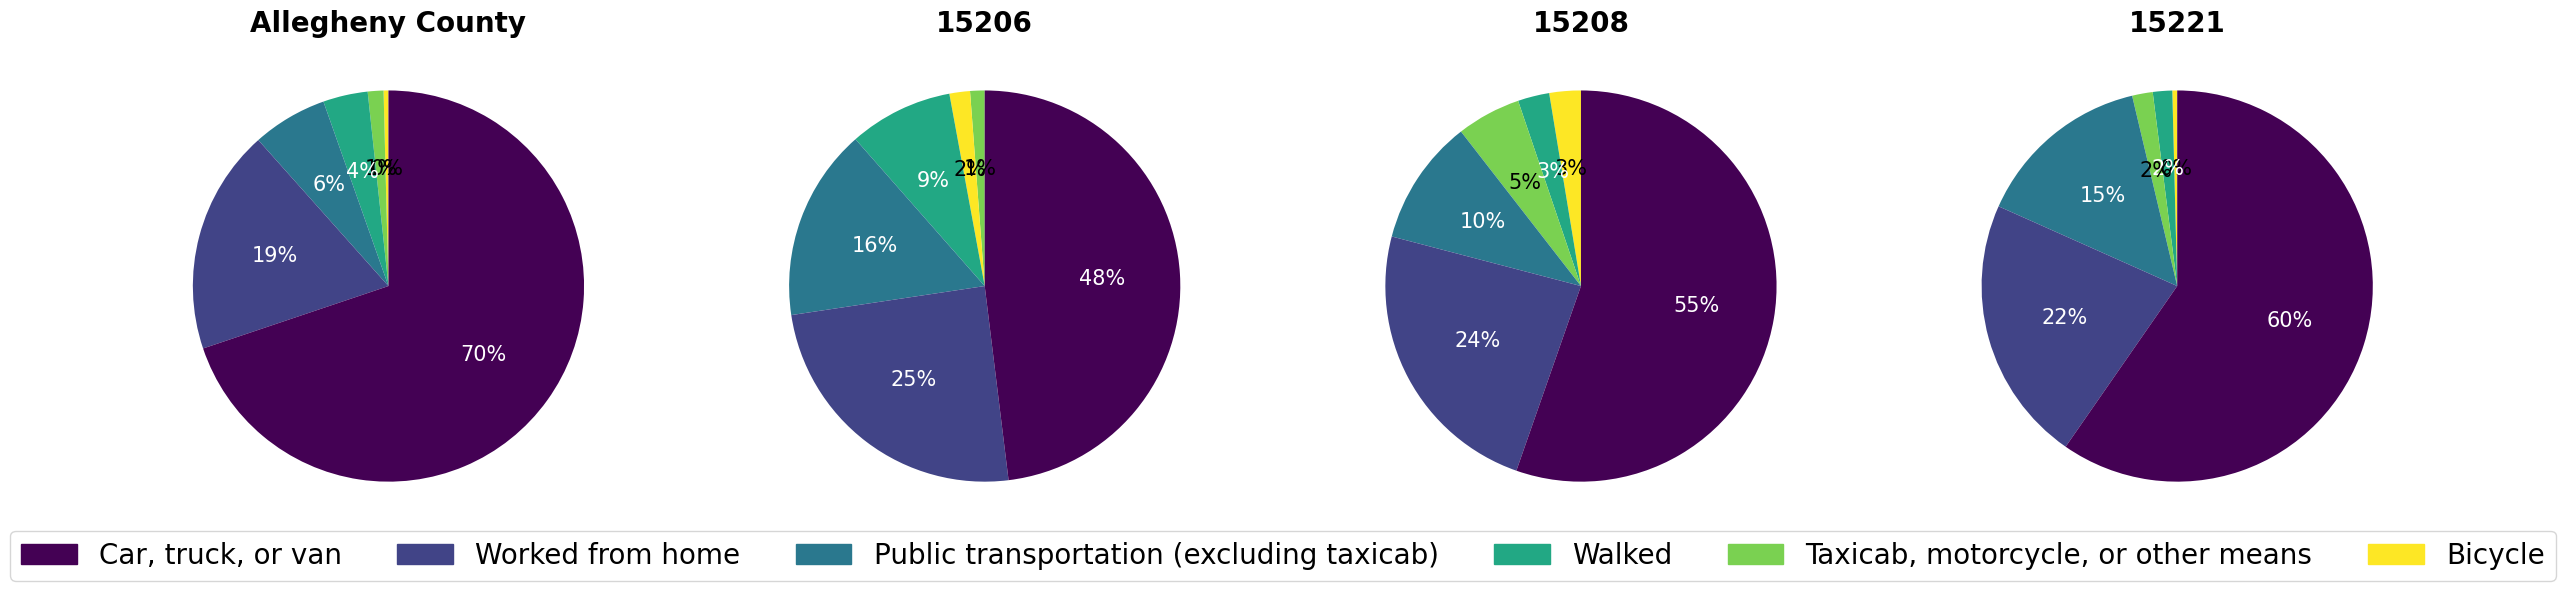

In [45]:
categories = ['Car, truck, or van', 'Worked from home', 'Public transportation (excluding taxicab)', 
              'Walked', 'Taxicab, motorcycle, or other means', 'Bicycle']

fig, axes = plt.subplots(1, num_zips, figsize=(6 * num_zips, 6))  # Adjust figsize as needed
colors = plt.cm.get_cmap('viridis', len(categories))(range(len(categories)))
patches = [plt.Rectangle((0, 0), 1, 1, color=colors[i]) for i in range(len(categories))]

for i, zip_code in enumerate(zips):
    zip_data = commute_data[commute_data['ZIP'] == zip_code]
    zip_data = zip_data[zip_data['Label'].isin(categories)]
    zip_data = zip_data.sort_values(by = 'Percent')
    sizes = zip_data['Percent']
    subplot_colors = [colors[list(categories).index(label)] for label in zip_data['Label']]
    
    ax = axes[i]
    patches_subplot, texts, autotexts = ax.pie(sizes, autopct = '%1.0f%%',
                                               shadow = False, startangle = 90, textprops={'fontsize': 15},
                                               colors = [colors[list(categories).index(label)] for label in zip_data['Label']])

    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax.set_title(f'{zip_code}', fontdict={'fontsize': 20, 'fontweight': 'bold'})
    ax.set_xlabel(None)
    ax.set_ylabel(None)

    # Adjust label properties
    for autotext, color in zip(autotexts, subplot_colors):
        r, g, b = to_rgb(color)
        brightness = 0.299 * r + 0.587 * g + 0.114 * b
        if brightness < 0.5:  # Adjust this threshold as needed
            autotext.set_color('white')
        else:
            autotext.set_color('black')

# Add a single legend to the figure
fig.legend(patches, categories, loc='lower center', bbox_to_anchor=(0.5, -0.05),
           ncol=len(categories), fontsize='20', bbox_transform=fig.transFigure)

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent overlap with suptitle
plt.show()